I used google colab for running the code, this is a simple code to upload the dataset zip file in runtime and extracting the folders.

Note: Please upload the zip file in the files section first

In [6]:
import zipfile
import os


zip_path = "/E-Waste classification dataset.zip"
extract_path = "/content/"

with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall(extract_path)


os.listdir(extract_path)

['.config', 'modified-dataset', 'sample_data']

In [3]:
import os
import random

random.seed(42)

test_path = r'/content/modified-dataset/test'
train_path = r'/content/modified-dataset/train'
valid_path = r'/content/modified-dataset/val'


Exploring directory: /content/modified-dataset/train
Found 10 classes: ['Battery', 'Keyboard', 'Microwave', 'Mobile', 'Mouse', 'PCB', 'Player', 'Printer', 'Television', 'Washing Machine']


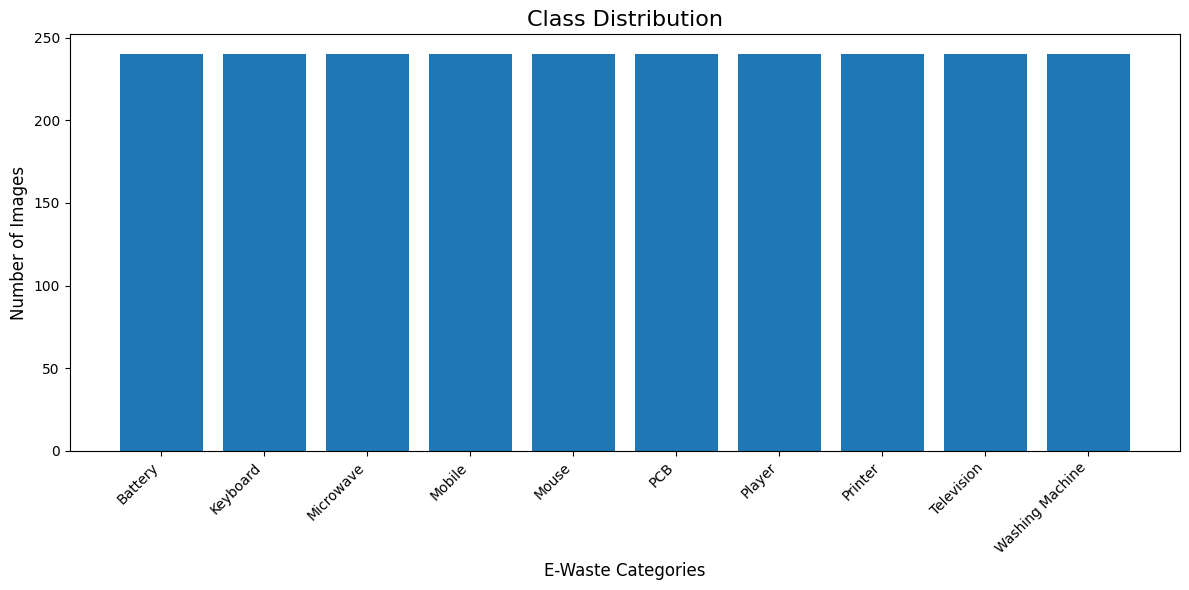

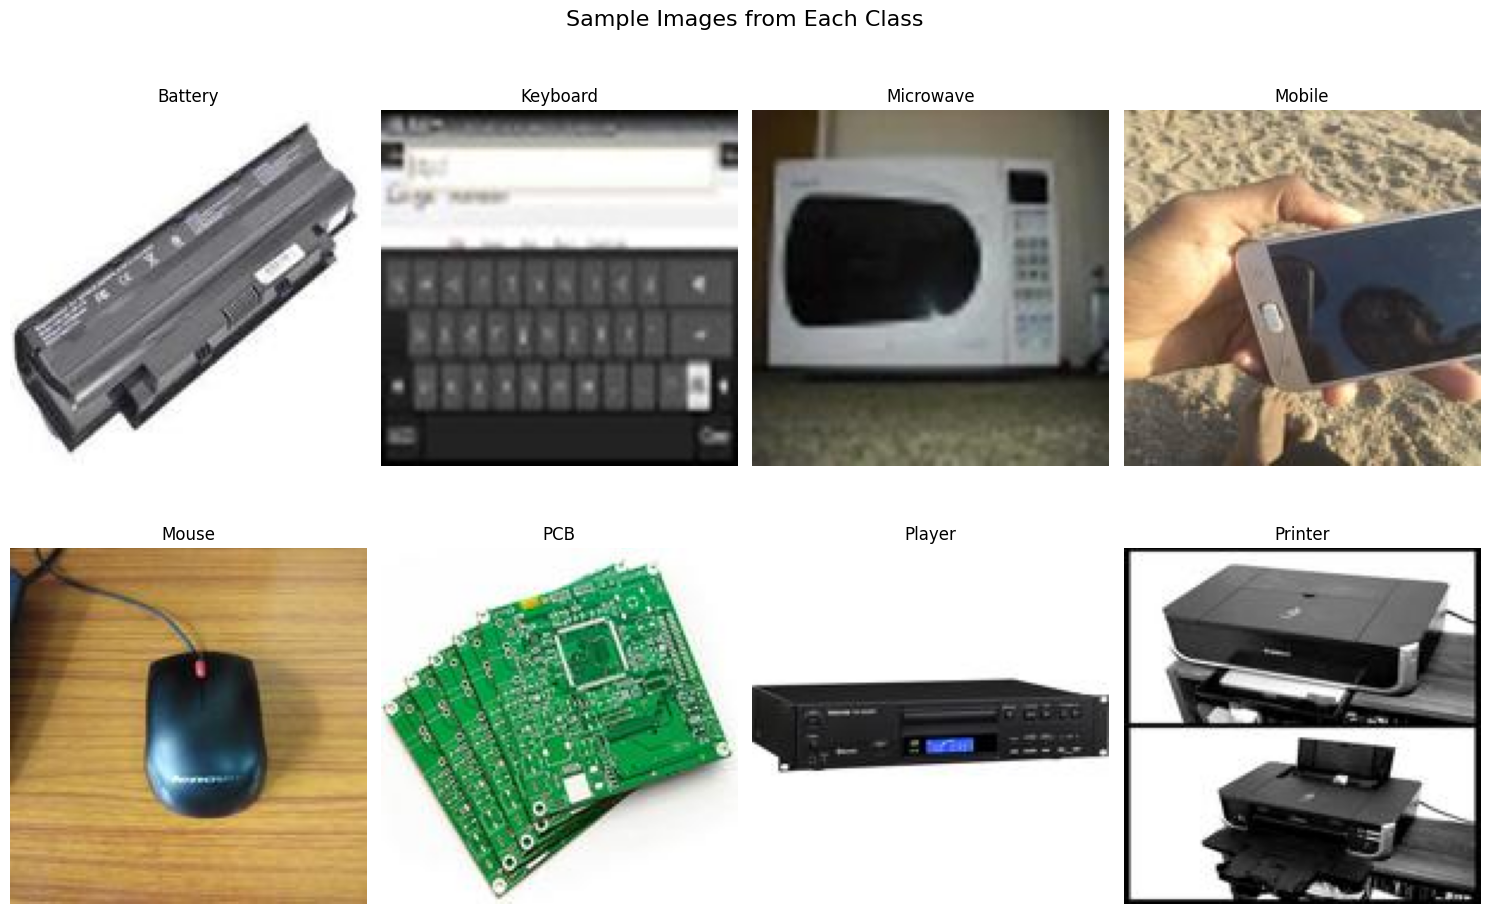


Exploring directory: /content/modified-dataset/val
Found 10 classes: ['Battery', 'Keyboard', 'Microwave', 'Mobile', 'Mouse', 'PCB', 'Player', 'Printer', 'Television', 'Washing Machine']


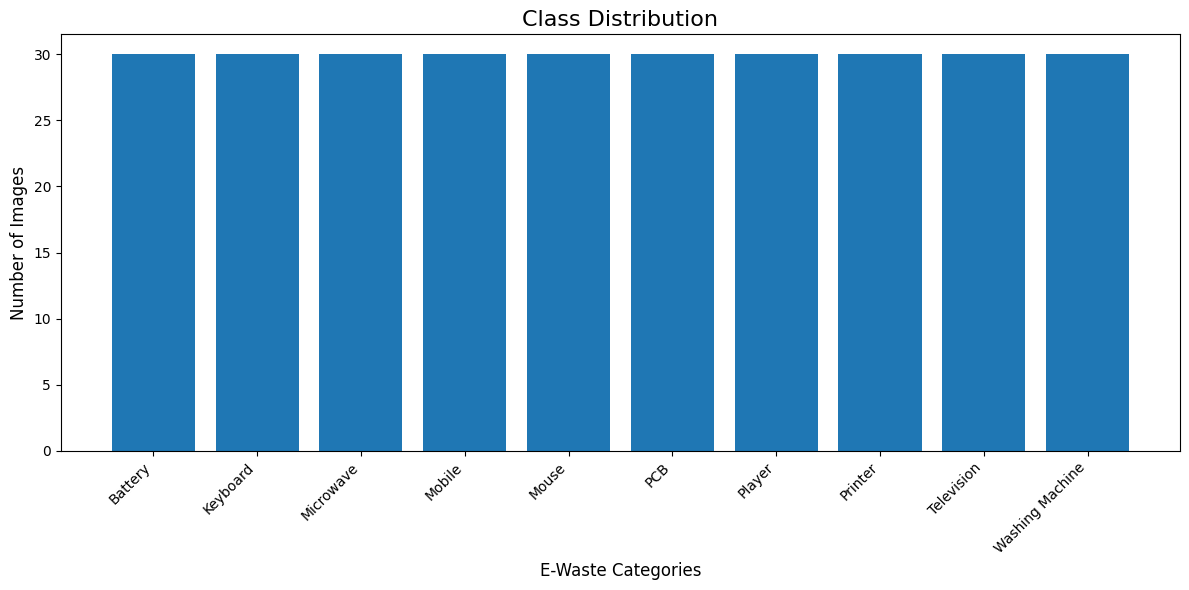

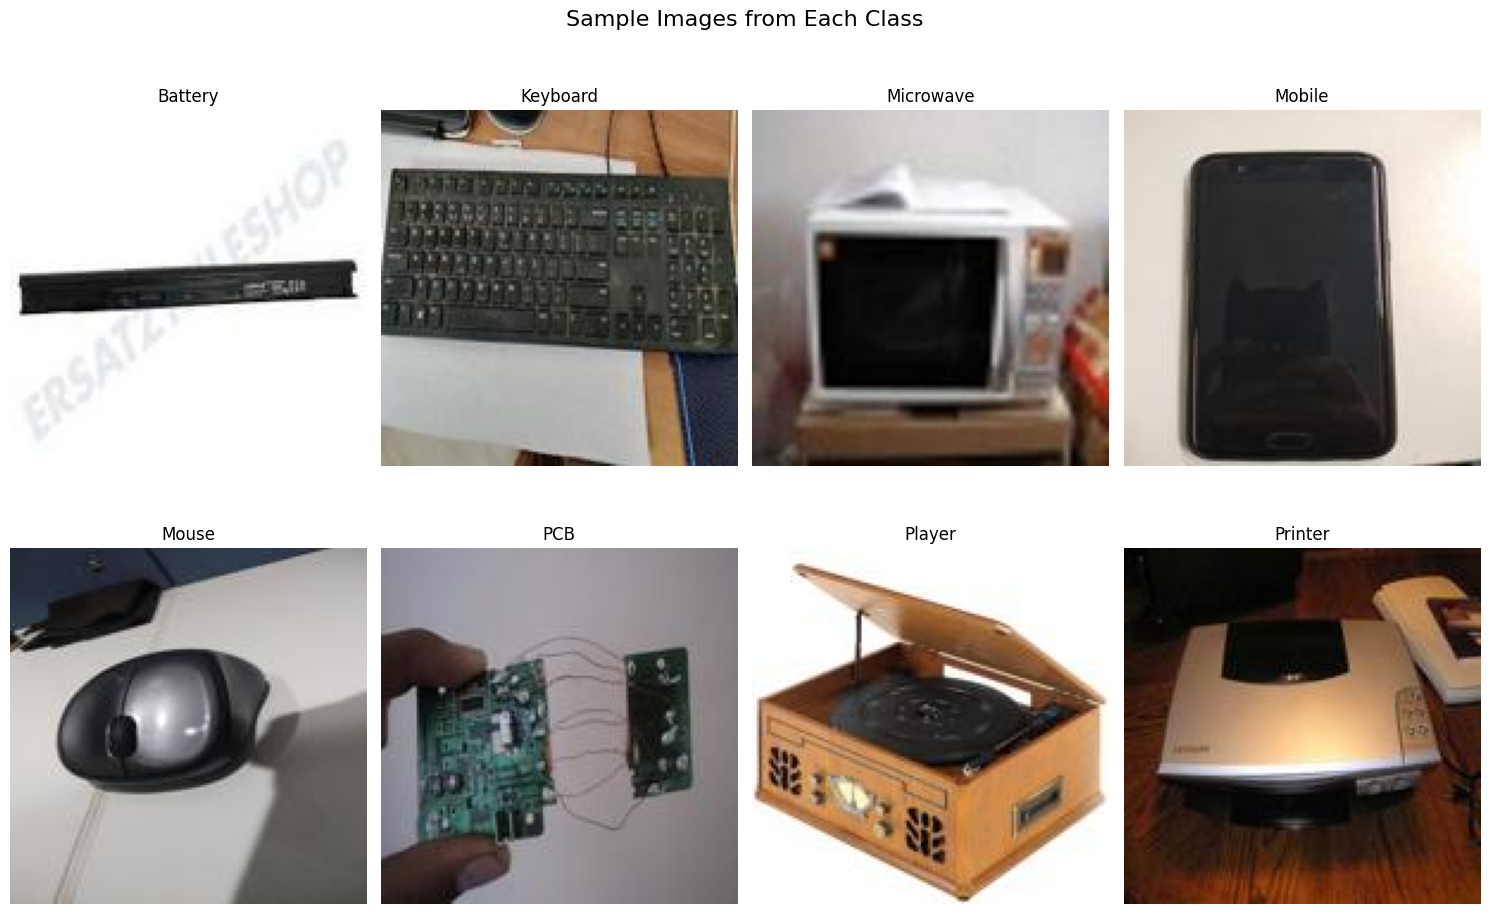


Exploring directory: /content/modified-dataset/test
Found 10 classes: ['Battery', 'Keyboard', 'Microwave', 'Mobile', 'Mouse', 'PCB', 'Player', 'Printer', 'Television', 'Washing Machine']


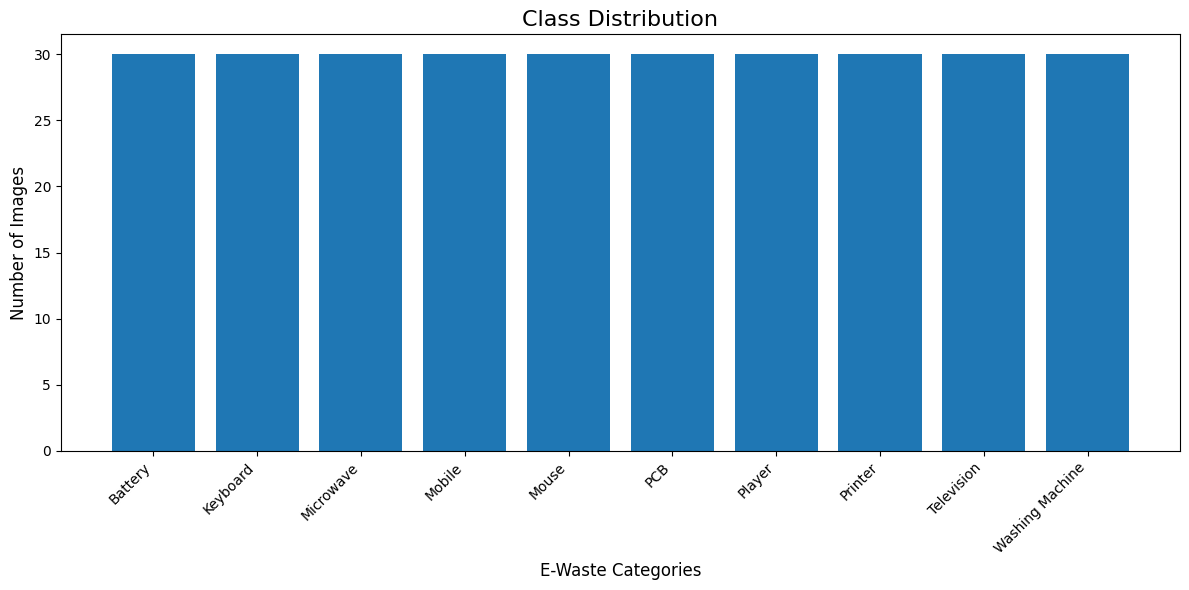

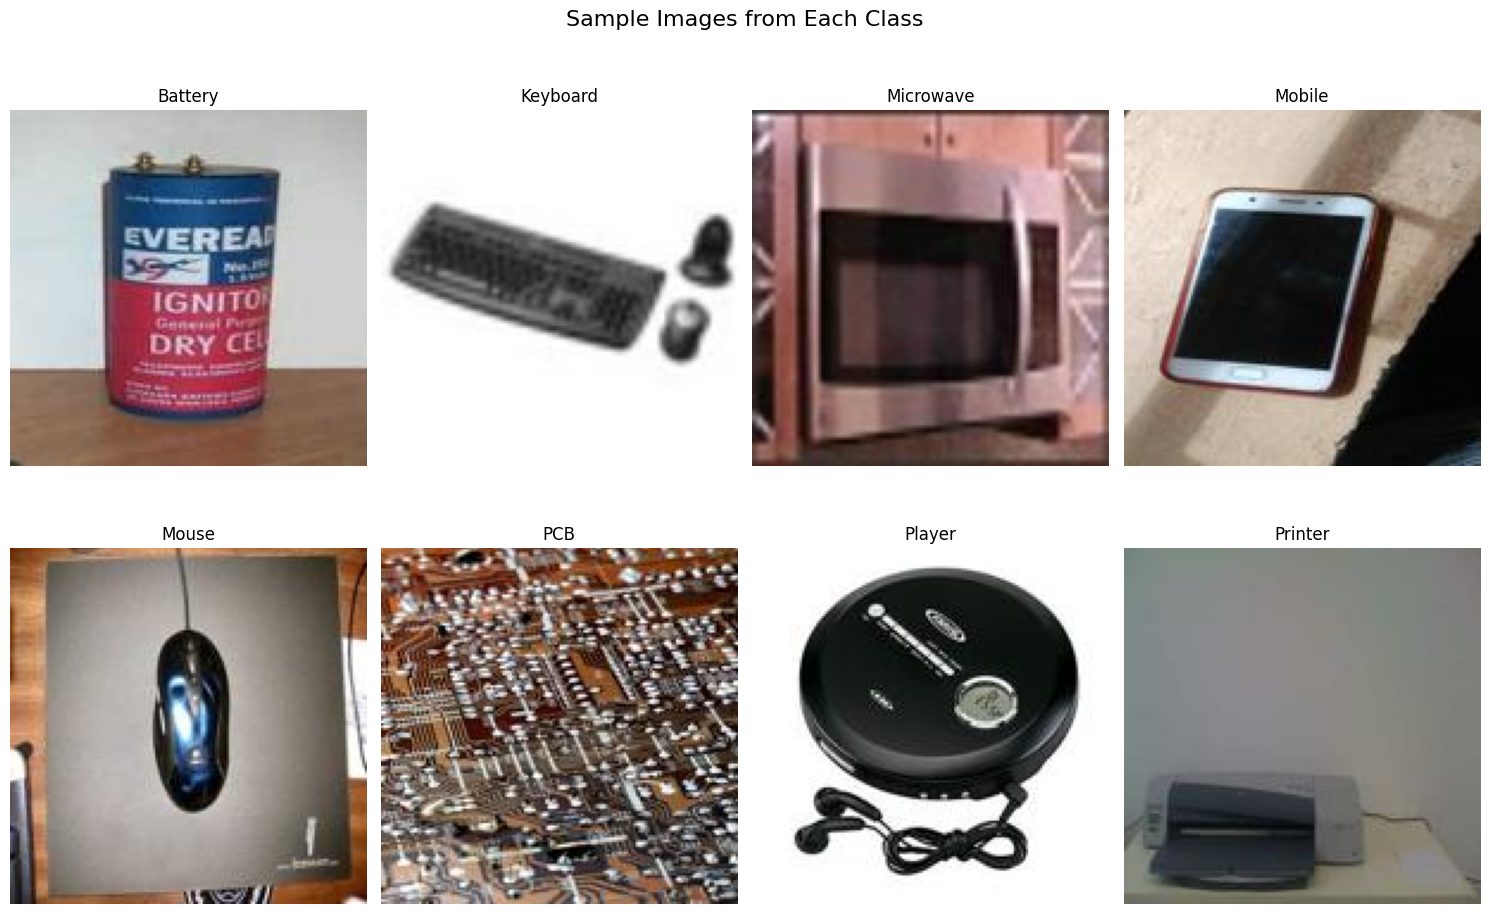

In [4]:
import matplotlib.pyplot as plt
from PIL import Image
import numpy as np

def explore_dataset(directory):
    """Explore the dataset structure and class distribution"""
    print(f"\nExploring directory: {directory}")

    classes = sorted(os.listdir(directory))
    print(f"Found {len(classes)} classes: {classes}")

    class_counts = {}
    image_paths = []

    for class_name in classes:
        class_dir = os.path.join(directory, class_name)
        count = len(os.listdir(class_dir))
        class_counts[class_name] = count

        if count > 0:
            sample_image = os.listdir(class_dir)[0]
            image_paths.append(os.path.join(class_dir, sample_image))

    plt.figure(figsize=(12, 6))
    plt.bar(class_counts.keys(), class_counts.values())
    plt.title('Class Distribution', fontsize=16)
    plt.xlabel('E-Waste Categories', fontsize=12)
    plt.ylabel('Number of Images', fontsize=12)
    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()
    plt.show()

    plt.figure(figsize=(15, 10))
    for i, img_path in enumerate(image_paths[:min(8, len(image_paths))]):
        plt.subplot(2, 4, i+1)
        img = Image.open(img_path)
        plt.imshow(img)
        plt.title(os.path.basename(os.path.dirname(img_path)))
        plt.axis('off')
    plt.suptitle('Sample Images from Each Class', fontsize=16)
    plt.tight_layout()
    plt.show()

    return classes, class_counts

train_classes, train_counts = explore_dataset(train_path)
val_classes, val_counts = explore_dataset(valid_path)
test_classes, test_counts = explore_dataset(test_path)